# Template Matching

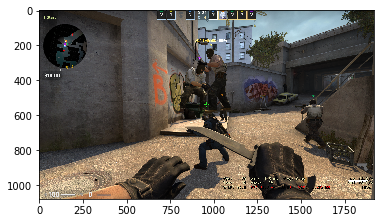

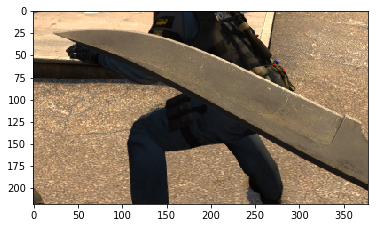

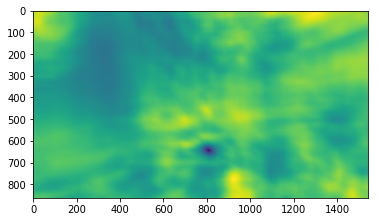

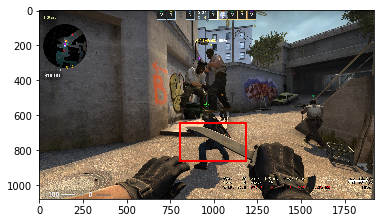

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
full=cv2.imread(r"C:\Users\Aditya\.anaconda\navigator\images\Screenshot (7).png")
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
knife=cv2.imread(r"C:\Users\Aditya\.anaconda\navigator\images\knife.png")
knife=cv2.cvtColor(knife,cv2.COLOR_BGR2RGB)
plt.imshow(full)
plt.show()
plt.imshow(knife)
plt.show()
res=cv2.matchTemplate(full,knife,cv2.TM_SQDIFF)
# Other methods include: cv2.TM_CCOEFF,cv2.TM_CCOEFF_Normed,cv2.TM_CCORR,cv2.TM_CCORR_NORMED,cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED
plt.imshow(res)
plt.show()
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
top_left=min_loc 
# FOR cv2.SQDIFF and cv2.SQDIFF_NORMED: top_left=min_loc 
# While for others: top_left=max_loc
height,width,channels=knife.shape
bottom_right=(top_left[0]+width,top_left[1]+height)
cv2.rectangle(full,top_left,bottom_right,(255,0,0),10)
plt.imshow(full)

# CornerHarris Detection

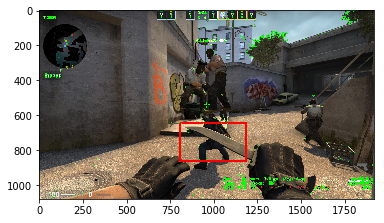

In [11]:
full_gray=cv2.cvtColor(full,cv2.COLOR_BGR2GRAY)
gray=np.float32(full_gray)
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst=cv2.dilate(dst,None)
full[dst>0.01*dst.max()]=[0,255,0]
plt.imshow(full)

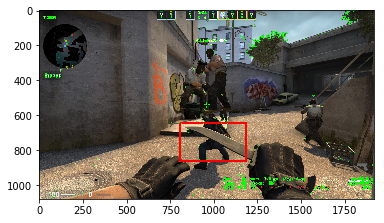

In [12]:
corners=cv2.goodFeaturesToTrack(full_gray,5,0.01,10)
corners=np.int0(corners)
for i in corners:
    x,y=i.ravel()
    cv2.circle(full,(x,y),3,(0,255,0),-1)
plt.imshow(full)